# Understanding calibration and how to calibrate scores in credit risk modeling

### Understanding basic terms

First, it would be important to understand the basic terms used here:

**PDO**: Points to Double the Odds - how many points does the score change if the odds double (for example, increase from 100:1 to 200:1). The common values of PDO are 20 or 40.

**Base score**: This is a baseline score. There is a certain meaning to this score, for example, a base score of 550 means the good bad odds is 20:1

So, if the baseline score is 550 meaning good bad odds 20:1 and PDO is 40, then a score of 590 will means good bad odds of 40:1, 630 means a good bad odds of 80:1 and so on.

### Scorecard Calibration

#### Step 1: Choose a calibration scale 

Choosing a calibration scale means defining the base score, good bad odds at base score and PDO. We choose a base score of 550 with good bad odds 20:1 and a PDO of 40

#### Step 2: Create the calibration table

In [1]:
import pandas as pd

In [2]:
points = pd.read_csv(r'C:\Users\Edward Korir\Desktop\score_card_points.csv')
points

,points,odds,log(odds)
0,270,0.15625,1.856298
1,310,0.31250,1.163151
2,350,0.62500,0.470004
3,390,1.25000,-0.223144
4,430,2.50000,-0.916291
5,470,5.00000,-1.609438
6,510,10.00000,-2.302585
7,550,20.00000,-2.995732
8,590,40.00000,-3.688879
9,630,80.00000,-4.382027


As we can see, start with the base score and keep on adding 40 points and doubling the odds. Similarly, keep on subtracting 40 points and halving the odds. The third column is then obtained by –LN(odds), for example, -LN(20) is -2.99 and –LN(40) is -3.68 and so on.

### Step 3: Create the calibration equation

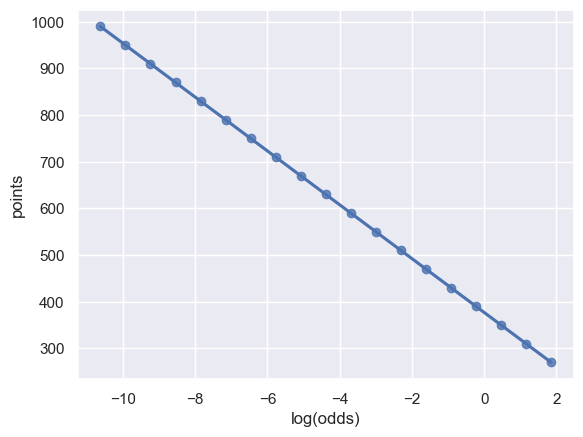

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")
p = sns.regplot(points, y='points', x='log(odds)')
plt.show()

In [9]:
p.get_lines()[0].get_xdata(),p.get_lines()[0].get_ydata()

(array([-10.62035126, -10.4943245 , -10.36829774, -10.24227098,
        -10.11624422,  -9.99021746,  -9.8641907 ,  -9.73816394,
         -9.61213718,  -9.48611042,  -9.36008366,  -9.2340569 ,
         -9.10803014,  -8.98200338,  -8.85597662,  -8.72994986,
         -8.6039231 ,  -8.47789634,  -8.35186958,  -8.22584282,
         -8.09981606,  -7.9737893 ,  -7.84776254,  -7.72173578,
         -7.59570902,  -7.46968226,  -7.3436555 ,  -7.21762874,
         -7.09160198,  -6.96557522,  -6.83954846,  -6.7135217 ,
         -6.58749494,  -6.46146818,  -6.33544142,  -6.20941466,
         -6.0833879 ,  -5.95736114,  -5.83133438,  -5.70530762,
         -5.57928086,  -5.4532541 ,  -5.32722734,  -5.20120058,
         -5.07517382,  -4.94914706,  -4.8231203 ,  -4.69709354,
         -4.57106678,  -4.44504002,  -4.31901325,  -4.19298649,
         -4.06695973,  -3.94093297,  -3.81490621,  -3.68887945,
         -3.56285269,  -3.43682593,  -3.31079917,  -3.18477241,
         -3.05874565,  -2.93271889,  -2.

In [10]:
import scipy

#calculate slope and intercept of regression equation
slope, intercept, r, p, sterr = scipy.stats.linregress(x=p.get_lines()[0].get_xdata(),
                                                       y=p.get_lines()[0].get_ydata())

#display slope and intercept of regression equation
print(intercept, slope)

377.12287620380147 -57.707801635583195


The term 57.708 here is also called **factor** (***PDO**/ln(2)*) and the term 377.12 is the **offset**.

$$y = -57.708x + 377.123$$

#### Step 4: Getting scorecard points for our dataset

Now that we have the calibration equation, we can easily get the scorecard points for our calibration scale. On the dataset which you are using, just apply the equation above where:

**x** is ln(p/(1-p)) or the log odds, where **p** is the probability of default obtained from the model; **y** is the score points

Please note that if we have the probabilities, we will have to first calculate ln(p/(1-p)) and then use it as x in our equation.

Hence the final calibration equation is:

$$score = -57.708 \times ln(\frac{p}{(1-p)} + 377.123$$

Where p is the probability of default.